In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import squarify

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels

import scipy.stats as stats

In [188]:
# Check the current directory
current_directory = os.getcwd()
print(current_directory)

C:\Users\eycho\Documents\CASA\qm\individual project


## 1. The monthly quantity of card issued & the monthly amount of charging and using a card

### 1.1 Data cleaning

In [189]:
# Read the first csv file

## [Gyeonggi Data Dream] The issuance and use of local currency data
## https://data.gg.go.kr/portal/data/service/selectServicePage.do?page=1&rows=10&sortColumn=&sortDirection=&infId=6FEDD6KGEJWYCY2G15OY29527318&infSeq=1&order=&searchWord=%EC%A7%80%EC%97%AD%ED%99%94%ED%8F%90

df1 = pd.read_csv('C:/Users/eycho/Documents/CASA/qm/individual project/지역화폐발행및이용현황.csv', encoding='cp949') #Korean incoding in MS
#df1 = pd.read_csv('/home/jovyan/work/individual project/지역화폐발행및이용현황.csv', encoding='cp949') #Korean incoding in MS #Docker에서 읽을 때
df1

,시군명,기준년월,월별카드발행수량(건),월별카드충전액(천원),월별카드사용액(천원),월별모바일상품권이용등록자수(명),월별모바일충전액(천원),월별모바일사용액(천원),월별지류상품권판매액(천원),월별지류상품권회수액(천원)
0,가평군,2022-06,572,"2,771,279","2,681,386",NaN,NaN,NaN,"350,130","266,475"
1,가평군,2022-05,627,"2,784,295","2,810,484",NaN,NaN,NaN,"213,080","133,195"
2,가평군,2022-04,641,"2,585,608","2,600,843",NaN,NaN,NaN,"130,194","117,225"
3,가평군,2022-03,481,"2,393,457","2,418,270",NaN,NaN,NaN,"120,715","127,420"
4,가평군,2022-02,427,"2,063,838","1,920,192",NaN,NaN,NaN,"111,400","140,825"
...,...,...,...,...,...,...,...,...,...,...
1297,화성시,2019-05,"10,661","4,449,088","1,392,631",NaN,NaN,NaN,NaN,NaN
1298,화성시,2019-04,"4,826","1,476,982","204,210",NaN,NaN,NaN,NaN,NaN
1299,화성시,2019-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,화성시,2019-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
# Filter only suwon data (수원시)
idx = df1[df1['시군명']!= '수원시'].index
df1 = df1.drop(idx)
df1.head(3)

,시군명,기준년월,월별카드발행수량(건),월별카드충전액(천원),월별카드사용액(천원),월별모바일상품권이용등록자수(명),월별모바일충전액(천원),월별모바일사용액(천원),월별지류상품권판매액(천원),월별지류상품권회수액(천원)
504,수원시,2022-06,"5,957","20,577,137","28,285,270",NaN,NaN,NaN,NaN,NaN
505,수원시,2022-05,"8,029","39,625,699","34,373,700",NaN,NaN,NaN,NaN,NaN
506,수원시,2022-04,"8,983","34,439,482","34,409,863",NaN,NaN,NaN,NaN,NaN


In [191]:
# Remove NaN columns
df1 = df1.drop(['월별모바일상품권이용등록자수(명)', '월별모바일충전액(천원)', '월별모바일사용액(천원)', '월별지류상품권판매액(천원)', '월별지류상품권회수액(천원)'], axis=1)
df1

,시군명,기준년월,월별카드발행수량(건),월별카드충전액(천원),월별카드사용액(천원)
504,수원시,2022-06,"5,957","20,577,137","28,285,270"
505,수원시,2022-05,"8,029","39,625,699","34,373,700"
506,수원시,2022-04,"8,983","34,439,482","34,409,863"
507,수원시,2022-03,"10,678","32,314,288","33,872,904"
508,수원시,2022-02,"10,004","26,493,652","30,490,745"
509,수원시,2022-01,"10,244","35,517,134","37,412,949"
510,수원시,2021-12,"11,793","38,589,931","35,437,544"
511,수원시,2021-11,"24,357","37,254,826","31,175,985"
512,수원시,2021-10,"18,658","20,422,726","23,899,626"
513,수원시,2021-09,"20,812","25,919,121","30,400,028"


In [192]:
# Remove NaN rows #Suwon pay launched in April 2019
df1 = df1.drop(df1.index[-3:])
df1 = df1.rename(columns={"시군명": "city", 
                          "기준년월": "year_month", 
                          "월별카드발행수량(건)": "the_monthly_quantity_of_card_issued", 
                          "월별카드충전액(천원)": "the_amount_of_charging_a_card", 
                          "월별카드사용액(천원)": "the_amount_of_using_a_card"})

df1['the_monthly_quantity_of_card_issued'] = df1['the_monthly_quantity_of_card_issued'].astype(int)
df1['the_amount_of_charging_a_card'] = df1['the_amount_of_charging_a_card'].astype(int)
df1['the_amount_of_using_a_card'] = df1['the_amount_of_using_a_card'].astype(int)
df1.tail(5)

,city,year_month,the_monthly_quantity_of_card_issued,the_amount_of_charging_a_card,the_amount_of_using_a_card
538,수원시,2019-08,6271,3339872,3305846
539,수원시,2019-07,8832,4603370,2782821
540,수원시,2019-06,4973,1344420,2083801
541,수원시,2019-05,17303,5567256,1917645
542,수원시,2019-04,4505,924101,151025


### 1.2 The monthly quantity of card issued

In [193]:
df1_issue = df1.iloc[:,[1,2]]
df1_issue = df1_issue.sort_values(by=['year_month'], ascending=True)
df1_issue

,year_month,the_monthly_quantity_of_card_issued
542,2019-04,4505
541,2019-05,17303
540,2019-06,4973
539,2019-07,8832
538,2019-08,6271
537,2019-09,4209
536,2019-10,7390
535,2019-11,3098
534,2019-12,5879
533,2020-01,5948


In [114]:
df1_issue.describe() #median = 11603 

,the_monthly_quantity_of_card_issued
count,39
mean,"19,532"
std,"32,633"
min,"3,098"
25%,"7,710"
50%,"11,603"
75%,"18,898"
max,"203,175"


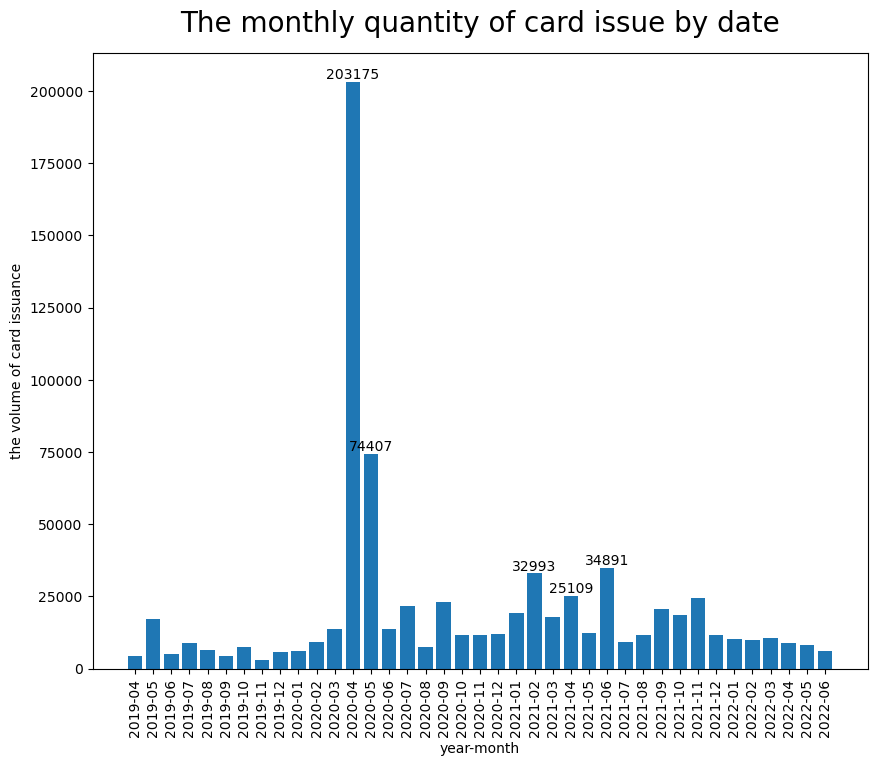

In [194]:
plt.figure(figsize = (10, 8))

x = df1_issue['year_month']
y = df1_issue['the_monthly_quantity_of_card_issued']
pd.options.display.float_format = '{:,.0f}'.format

bars = plt.bar(x, y)
labels = y.mask(df1_issue['the_monthly_quantity_of_card_issued'] < 25000, '')
plt.bar_label(bars, labels, size = 10)

plt.xlabel('year-month')
plt.ylabel('the volume of card issuance')
plt.xticks(rotation=90)
plt.title('The monthly quantity of card issue by date', fontsize = 20, pad = 15)
plt.savefig('The monthly quantity of card issue by date.png', dpi=200, transparent=False)

### 1.3 The monthly amount of charging and using a card

In [195]:
df1_charge_use = df1.iloc[:,[1,3,4]]
df1_charge_use = df1_charge_use.sort_values(by=['year_month'], ascending=True)
df1_charge_use['the_amount_of_charging_a_card'] = df1_charge_use['the_amount_of_charging_a_card'] / 1000
df1_charge_use['the_amount_of_using_a_card'] = df1_charge_use['the_amount_of_using_a_card'] / 1000
df1_charge_use

,year_month,the_amount_of_charging_a_card,the_amount_of_using_a_card
542,2019-04,924,151
541,2019-05,"5,567","1,918"
540,2019-06,"1,344","2,084"
539,2019-07,"4,603","2,783"
538,2019-08,"3,340","3,306"
537,2019-09,"1,373","2,398"
536,2019-10,"5,550","3,240"
535,2019-11,"1,707","3,309"
534,2019-12,"5,005","3,508"
533,2020-01,"4,803","3,644"


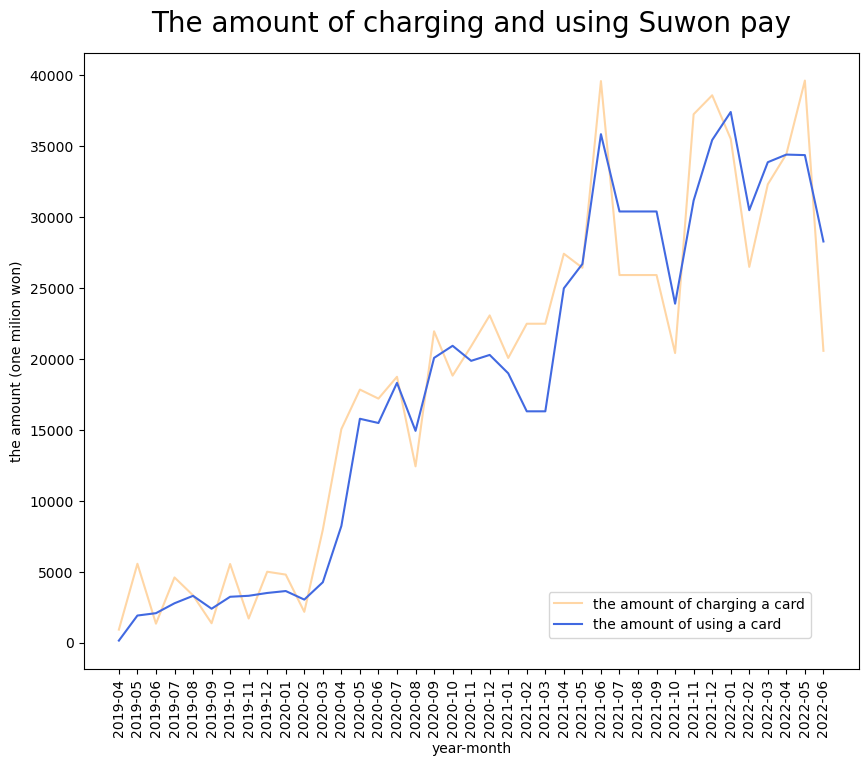

In [196]:
plt.figure(figsize = (10, 8))

x = df1_charge_use['year_month']
y1 = df1_charge_use['the_amount_of_charging_a_card']
y2 = df1_charge_use['the_amount_of_using_a_card']

plt.plot(x, y1, '#ffd6a5', label = 'the amount of charging a card') 
plt.plot(x, y2, 'royalblue', label = 'the amount of using a card') 
plt.legend(loc=(0.6, 0.05))
plt.xlabel('year-month')
plt.ylabel('the amount (one milion won)')
plt.xticks(rotation=90)
plt.title('The amount of charging and using Suwon pay', fontsize = 20, pad = 15)

plt.savefig('The amount of charging and using a card.png', dpi=200, transparent=False)

## 2. The frequency of using Suwon-pay by variables (age, 

### 2.1. Data cleaning

In [197]:
# Read the second csv file

## [Public data portal] Local currency payment data of Suwon-si, Gyeonggi-do
## https://www.data.go.kr/en/data/15075618/fileData.do

df2 = pd.read_csv('C:/Users/eycho/Documents/CASA/qm/individual project/경기도 수원시_지역화폐 결제 정보_20201211.csv', encoding='cp949') #Korean incoding in MS
#df2 = pd.read_csv('/home/jovyan/work/individual project/경기도 수원시_지역화폐 결제 정보_20201211.csv', encoding='cp949') #Korean incoding in MS
df2

,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액,데이터기준일자
0,2020-11,권선구,고색동,남,10대,레져업소,20,106900,2020-12-11
1,2020-11,권선구,고색동,남,10대,보건위생,3,29000,2020-12-11
2,2020-11,권선구,고색동,남,10대,서적문구,1,5600,2020-12-11
3,2020-11,권선구,고색동,남,10대,약국,1,13600,2020-12-11
4,2020-11,권선구,고색동,남,10대,유통업영리,70,2160910,2020-12-11
...,...,...,...,...,...,...,...,...,...
128645,2019-04,팔달구,화서동,여,60대이상,약국,2,17900,2020-12-11
128646,2019-04,팔달구,화서동,여,60대이상,유통업영리,3,27690,2020-12-11
128647,2019-04,팔달구,화서동,여,60대이상,음료식품,2,12000,2020-12-11
128648,2019-04,팔달구,화서동,여,60대이상,의원,4,72900,2020-12-11


In [198]:
# Remove the columns that are not used
df2 = df2.drop(['성별', '결제건수', '데이터기준일자'], axis=1)
df2 = df2.rename(columns={"기준년월": "year_month", 
                          "시군구명": "borough", 
                          "읍면동명": "ward", 
                          "연령대": "age", 
                          "업종명": "category", 
                          "결제금액": "payment_won"})
df2['payment_one_milion_won'] = round((df2['payment_won'] / 1000000), 2)
df2.head()

,year_month,borough,ward,age,category,payment_won,payment_one_milion_won
0,2020-11,권선구,고색동,10대,레져업소,106900,0
1,2020-11,권선구,고색동,10대,보건위생,29000,0
2,2020-11,권선구,고색동,10대,서적문구,5600,0
3,2020-11,권선구,고색동,10대,약국,13600,0
4,2020-11,권선구,고색동,10대,유통업영리,2160910,2


In [199]:
# Change Korean to English(borough)
df2.loc[df2.borough.str.contains('권선구'), 'borough'] = 'Gwonseon-gu'
df2.loc[df2.borough.str.contains('영통구'), 'borough'] = 'Yeongtong-gu'
df2.loc[df2.borough.str.contains('장안구'), 'borough'] = 'Jangan-gu'
df2.loc[df2.borough.str.contains('팔달구'), 'borough'] = 'Paldal-gu'

# Change Korean to English(age)
df2.loc[df2.age.str.contains('10세미만'), 'age'] = 'less than 10'
df2.loc[df2.age.str.contains('10대'), 'age'] = '10s'
df2.loc[df2.age.str.contains('20대'), 'age'] = '20s'
df2.loc[df2.age.str.contains('30대'), 'age'] = '30s'
df2.loc[df2.age.str.contains('40대'), 'age'] = '40s'
df2.loc[df2.age.str.contains('50대'), 'age'] = '50s'
df2.loc[df2.age.str.contains('60대이상'), 'age'] = 'over_60s'

In [200]:
# Change Korean to English(ward_Gwonseon-gu)
df2.loc[df2.ward.str.contains('고색동'), 'ward'] = 'Gosaek-dong'
df2.loc[df2.ward.str.contains('곡반정동'), 'ward'] = 'Gokbanjeon-dong'
df2.loc[df2.ward.str.contains('구운동'), 'ward'] = 'Guun-dong'
df2.loc[df2.ward.str.contains('권선동'), 'ward'] = 'Gwonseon-dong'
df2.loc[df2.ward.str.contains('금곡동'), 'ward'] = 'Geumgok-dong'
df2.loc[df2.ward.str.contains('당수동'), 'ward'] = 'Dangsu-dong'
df2.loc[df2.ward.str.contains('대황교동'), 'ward'] = 'Daehwanggyo-dong'
df2.loc[df2.ward.str.contains('서둔동'), 'ward'] = 'Seodun-dong'
df2.loc[df2.ward.str.contains('세류동'), 'ward'] = 'Seryu-dong'
df2.loc[df2.ward.str.contains('오목천동'), 'ward'] = 'Omokchen-dong'
df2.loc[df2.ward.str.contains('입북동'), 'ward'] = 'Ipbuk-dong'
df2.loc[df2.ward.str.contains('장지동'), 'ward'] = 'Jangji-dong'
df2.loc[df2.ward.str.contains('탑동'), 'ward'] = 'Tap-dong'
df2.loc[df2.ward.str.contains('평동'), 'ward'] = 'Pyeong-dong'
df2.loc[df2.ward.str.contains('평리동'), 'ward'] = 'Pyeongri-dong'
df2.loc[df2.ward.str.contains('호매실동'), 'ward'] = 'Homaesil-dong'

In [201]:
# Change Korean to English(ward_Yeongtong-gu)
df2.loc[df2.ward.str.contains('망포동'), 'ward'] = 'Mangpo-dong'
df2.loc[df2.ward.str.contains('매탄동'), 'ward'] = 'Maetan-dong'
df2.loc[df2.ward.str.contains('신동'), 'ward'] = 'Sin-dong'
df2.loc[df2.ward.str.contains('영통동'), 'ward'] = 'Yeongtong-dong'
df2.loc[df2.ward.str.contains('원천동'), 'ward'] = 'Woncheon-dong'
df2.loc[df2.ward.str.contains('이의동'), 'ward'] = 'Iui-dong'
df2.loc[df2.ward.str.contains('하동'), 'ward'] = 'Ha-dong'

In [202]:
# Change Korean to English(ward_Jangan-gu)
df2.loc[df2.ward.str.contains('상광교동'), 'ward'] = 'Sanggwanggyo-dong'
df2.loc[df2.ward.str.contains('송죽동'), 'ward'] = 'Songjuk-dong'
df2.loc[df2.ward.str.contains('연무동'), 'ward'] = 'Yeonmu-dong'
df2.loc[df2.ward.str.contains('영화동'), 'ward'] = 'Yeonghwa-dong'
df2.loc[df2.ward.str.contains('율전동'), 'ward'] = 'Yuljeon-dong'
df2.loc[df2.ward.str.contains('이목동'), 'ward'] = 'Imok-dong'
df2.loc[df2.ward.str.contains('정자동'), 'ward'] = 'Jeongja-dong'
df2.loc[df2.ward.str.contains('조원동'), 'ward'] = 'Jowon-dong'
df2.loc[df2.ward.str.contains('천천동'), 'ward'] = 'Cheoncheon-dong'
df2.loc[df2.ward.str.contains('파장동'), 'ward'] = 'Pajang-dong'
df2.loc[df2.ward.str.contains('하광교동'), 'ward'] = 'Hangwanggyo-dong'

In [203]:
# Change Korean to English(ward_Paldal-gu)
df2.loc[df2.ward.str.contains('고등동'), 'ward'] = 'Godeung-dong'
df2.loc[df2.ward.str.contains('교동'), 'ward'] = 'Gyo-dong'
df2.loc[df2.ward.str.contains('구천동'), 'ward'] = 'Gucheon-dong'
df2.loc[df2.ward.str.contains('남수동'), 'ward'] = 'Namsu-dong'
df2.loc[df2.ward.str.contains('남창동'), 'ward'] = 'Namchang-dong'
df2.loc[df2.ward.str.contains('매교동'), 'ward'] = 'Maegyo-dong'
df2.loc[df2.ward.str.contains('매산로1가'), 'ward'] = 'Maesanro1ga'
df2.loc[df2.ward.str.contains('매산로2가'), 'ward'] = 'Maesanro2ga'
df2.loc[df2.ward.str.contains('매산로3가'), 'ward'] = 'Maesanro3ga'
df2.loc[df2.ward.str.contains('매향동'), 'ward'] = 'Maehyang-dong'
df2.loc[df2.ward.str.contains('북수동'), 'ward'] = 'Buksu-dong'
df2.loc[df2.ward.str.contains('신풍동'), 'ward'] = 'Sinpung-dong'
df2.loc[df2.ward.str.contains('영동'), 'ward'] = 'Yeong-dong'
df2.loc[df2.ward.str.contains('우만동'), 'ward'] = 'Uman-dong'
df2.loc[df2.ward.str.contains('인계동'), 'ward'] = 'Ingye-dong'
df2.loc[df2.ward.str.contains('장안동'), 'ward'] = 'Jangan-dong'
df2.loc[df2.ward.str.contains('중동'), 'ward'] = 'Jung-dong'
df2.loc[df2.ward.str.contains('지동'), 'ward'] = 'Ji-dong'
df2.loc[df2.ward.str.contains('팔달로1가'), 'ward'] = 'Paldallo1ga'
df2.loc[df2.ward.str.contains('팔달로2가'), 'ward'] = 'Paldallo2ga'
df2.loc[df2.ward.str.contains('팔달로3가'), 'ward'] = 'Paldallo3ga'
df2.loc[df2.ward.str.contains('화서동'), 'ward'] = 'Hwaseo-dong'

In [204]:
# Change Korean to English(category)
df2.loc[df2.category.str.contains('가구'), 'category'] = 'Furniture'
df2.loc[df2.category.str.contains('건강식품'), 'category'] = 'Health_food'
df2.loc[df2.category.str.contains('건축자재'), 'category'] = 'Buiding_materials'
df2.loc[df2.category.str.contains('광학제품'), 'category'] = 'Optical_products'
df2.loc[df2.category.str.contains('기타의료기관'), 'category'] = 'Other_medical_institutions'

df2.loc[df2.category.str.contains('농업'), 'category'] = 'Agiculture'
df2.loc[df2.category.str.contains('레져업소'), 'category'] = 'Leisure_shop'
df2.loc[df2.category.str.contains('레져용품'), 'category'] = 'Leisure_supplies'
df2.loc[df2.category.str.contains('문화·취미'), 'category'] = 'Culture_and_hobby' 
df2.loc[df2.category.str.contains('병원'), 'category'] = 'Hospital'

df2.loc[df2.category.str.contains('보건위생'), 'category'] = 'Health_and_sanitation'
df2.loc[df2.category.str.contains('사무통신'), 'category'] = 'Office_communication'
df2.loc[df2.category.str.contains('서적문구'), 'category'] = 'Books_and_stationery'
df2.loc[df2.category.str.contains('수리서비스'), 'category'] = 'Repair_service'
df2.loc[df2.category.str.contains('숙박업'), 'category'] = 'Accommodation_business'

df2.loc[df2.category.str.contains('신변잡화'), 'category'] = 'Miscellaneous_goods'
df2.loc[df2.category.str.contains('약국'), 'category'] = 'Pharmacy'
df2.loc[df2.category.str.contains('여행'), 'category'] = 'Travel'
df2.loc[df2.category.str.contains('연료판매점'), 'category'] = 'Fuel_shop'
df2.loc[df2.category.str.contains('용역서비스'), 'category'] = 'Service'

df2.loc[df2.category.str.contains('유통업비영리'), 'category'] = 'Distribution_Industry_non_profit'
df2.loc[df2.category.str.contains('유통업영리'), 'category'] = 'Distribution_Industry_for_profit'
df2.loc[df2.category.str.contains('음료식품'), 'category'] = 'Beverage_and_food'
df2.loc[df2.category.str.contains('의류'), 'category'] = 'Clothing'
df2.loc[df2.category.str.contains('의원'), 'category'] = 'GP'

df2.loc[df2.category.str.contains('일반·휴게음식'), 'category'] = 'Restaurants' 
df2.loc[df2.category.str.contains('자동차정비·유지'), 'category'] = 'Automobile_maintenance' 
df2.loc[df2.category.str.contains('자동차판매'), 'category'] = 'Car_sales'
df2.loc[df2.category.str.contains('전기제품'), 'category'] = 'Electrical_appliances'
df2.loc[df2.category.str.contains('주방용구'), 'category'] = 'Kitchen_utensils'

df2.loc[df2.category.str.contains('직물'), 'category'] = 'Textiles'
df2.loc[df2.category.str.contains('학원'), 'category'] = 'Private_educational_institutes'
df2.loc[df2.category.str.contains('회원제형태업소'), 'category'] = 'Membership_type_shops'
df2

,year_month,borough,ward,age,category,payment_won,payment_one_milion_won
0,2020-11,Gwonseon-gu,Gosaek-dong,10s,Leisure_shop,106900,0
1,2020-11,Gwonseon-gu,Gosaek-dong,10s,Health_and_sanitation,29000,0
2,2020-11,Gwonseon-gu,Gosaek-dong,10s,Books_and_stationery,5600,0
3,2020-11,Gwonseon-gu,Gosaek-dong,10s,Pharmacy,13600,0
4,2020-11,Gwonseon-gu,Gosaek-dong,10s,Distribution_Industry_for_profit,2160910,2
...,...,...,...,...,...,...,...
128645,2019-04,Paldal-gu,Hwaseo-dong,over_60s,Pharmacy,17900,0
128646,2019-04,Paldal-gu,Hwaseo-dong,over_60s,Distribution_Industry_for_profit,27690,0
128647,2019-04,Paldal-gu,Hwaseo-dong,over_60s,Beverage_and_food,12000,0
128648,2019-04,Paldal-gu,Hwaseo-dong,over_60s,GP,72900,0


### 2.2. The frequency of using Suwon-pay by age

In [205]:
df2_age = df2.iloc[:, [3,5,6]]
df2_age

,age,payment_won,payment_one_milion_won
0,10s,106900,0
1,10s,29000,0
2,10s,5600,0
3,10s,13600,0
4,10s,2160910,2
...,...,...,...
128645,over_60s,17900,0
128646,over_60s,27690,0
128647,over_60s,12000,0
128648,over_60s,72900,0


In [206]:
# Remove one rows(less than 10s) # People more than 14 can use Suwon pay 
df2_age_grp = df2_age.groupby('age').sum().reset_index()
df2_age_grp = df2_age_grp.drop(df2_age_grp.index[5])
df2_age_grp

,age,payment_won,payment_one_milion_won
0,10s,3015095454,"3,014"
1,20s,53503709497,"53,503"
2,30s,51542609941,"51,542"
3,40s,73609329811,"73,608"
4,50s,36478551937,"36,478"
6,over_60s,12985004530,"12,984"


In [207]:
# reindex on age order from 10s to over 60s
df2_age_total = df2_age_grp.reset_index()
df2_age_total = df2_age_total.drop(['index'], axis=1)
df2_age_total

,age,payment_won,payment_one_milion_won
0,10s,3015095454,"3,014"
1,20s,53503709497,"53,503"
2,30s,51542609941,"51,542"
3,40s,73609329811,"73,608"
4,50s,36478551937,"36,478"
5,over_60s,12985004530,"12,984"


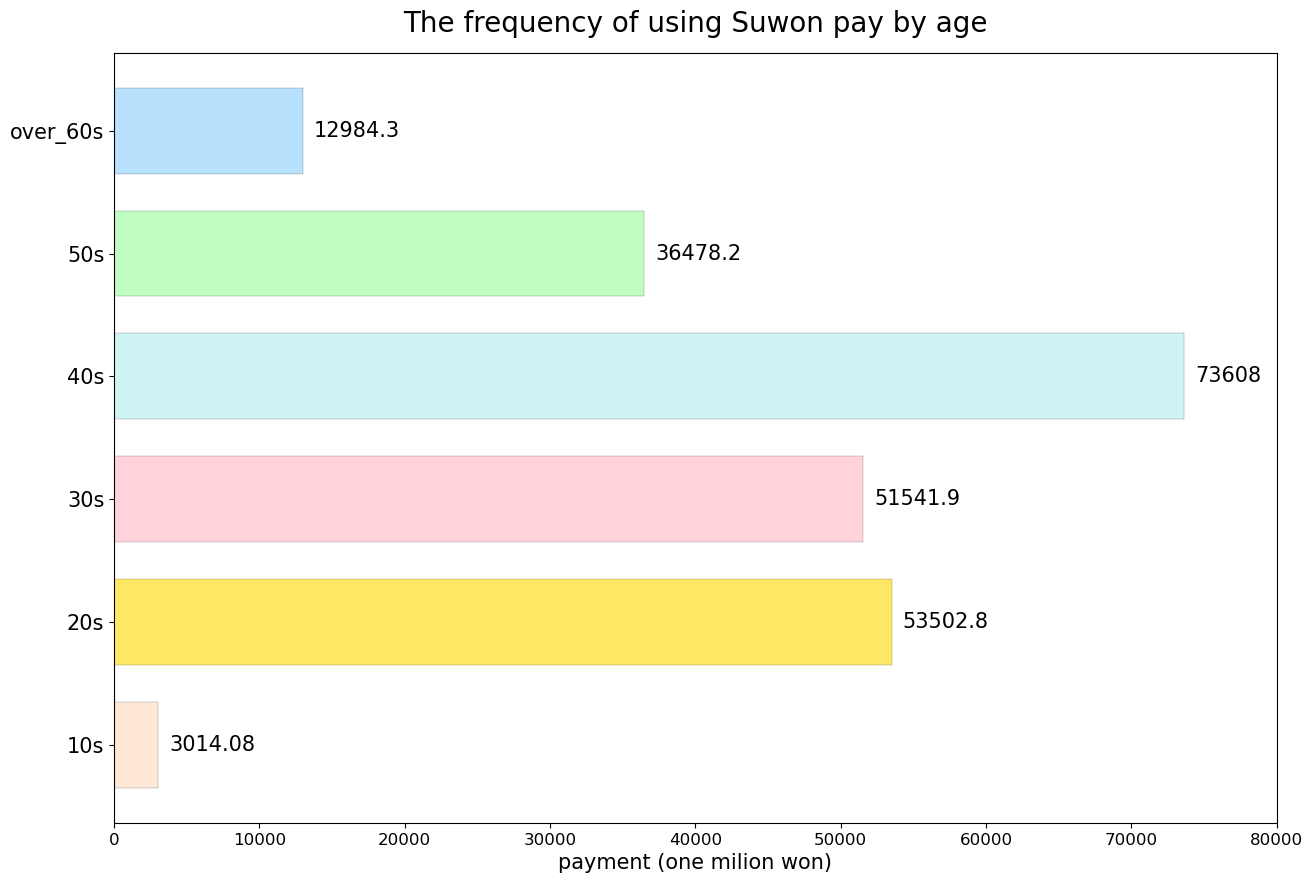

In [208]:
plt.figure(figsize = (15, 10))

x = df2_age_total['age']
y = df2_age_total['payment_one_milion_won']

bars = plt.barh(x, y, 
         color = ['peachpuff', 'gold', 'lightpink', 'paleturquoise', 'palegreen', 'lightskyblue'], 
         height=0.7, alpha=0.6, edgecolor = 'black', linewidth=0.2)
plt.bar_label(bars, size = 15, padding = 8)

plt.xlabel('payment (one milion won)', size = 15)
#plt.ylabel('age', size = 15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.title('The frequency of using Suwon pay by age', fontsize = 20, pad = 15)
plt.xlim(0,80000)

plt.savefig('The frequency of using Suwon pay by age.png', dpi=200, transparent=False)
plt.show()

### 2.3. The frequency of using Suwon-pay by borough('gu' in Korean)

In [209]:
df2_brgh = df2.iloc[:, [1,5,6]]
df2_brgh

,borough,payment_won,payment_one_milion_won
0,Gwonseon-gu,106900,0
1,Gwonseon-gu,29000,0
2,Gwonseon-gu,5600,0
3,Gwonseon-gu,13600,0
4,Gwonseon-gu,2160910,2
...,...,...,...
128645,Paldal-gu,17900,0
128646,Paldal-gu,27690,0
128647,Paldal-gu,12000,0
128648,Paldal-gu,72900,0


In [210]:
df2_brgh_total = df2_brgh.groupby('borough').sum()
df2_brgh_total = df2_brgh_total.sort_values(by=['payment_won'], ascending=True)
df2_brgh_total = df2_brgh_total.reset_index()
df2_brgh_total

,borough,payment_won,payment_one_milion_won
0,Paldal-gu,47474530849,"47,472"
1,Jangan-gu,49126894457,"49,125"
2,Gwonseon-gu,59102926768,"59,102"
3,Yeongtong-gu,75447735311,"75,447"


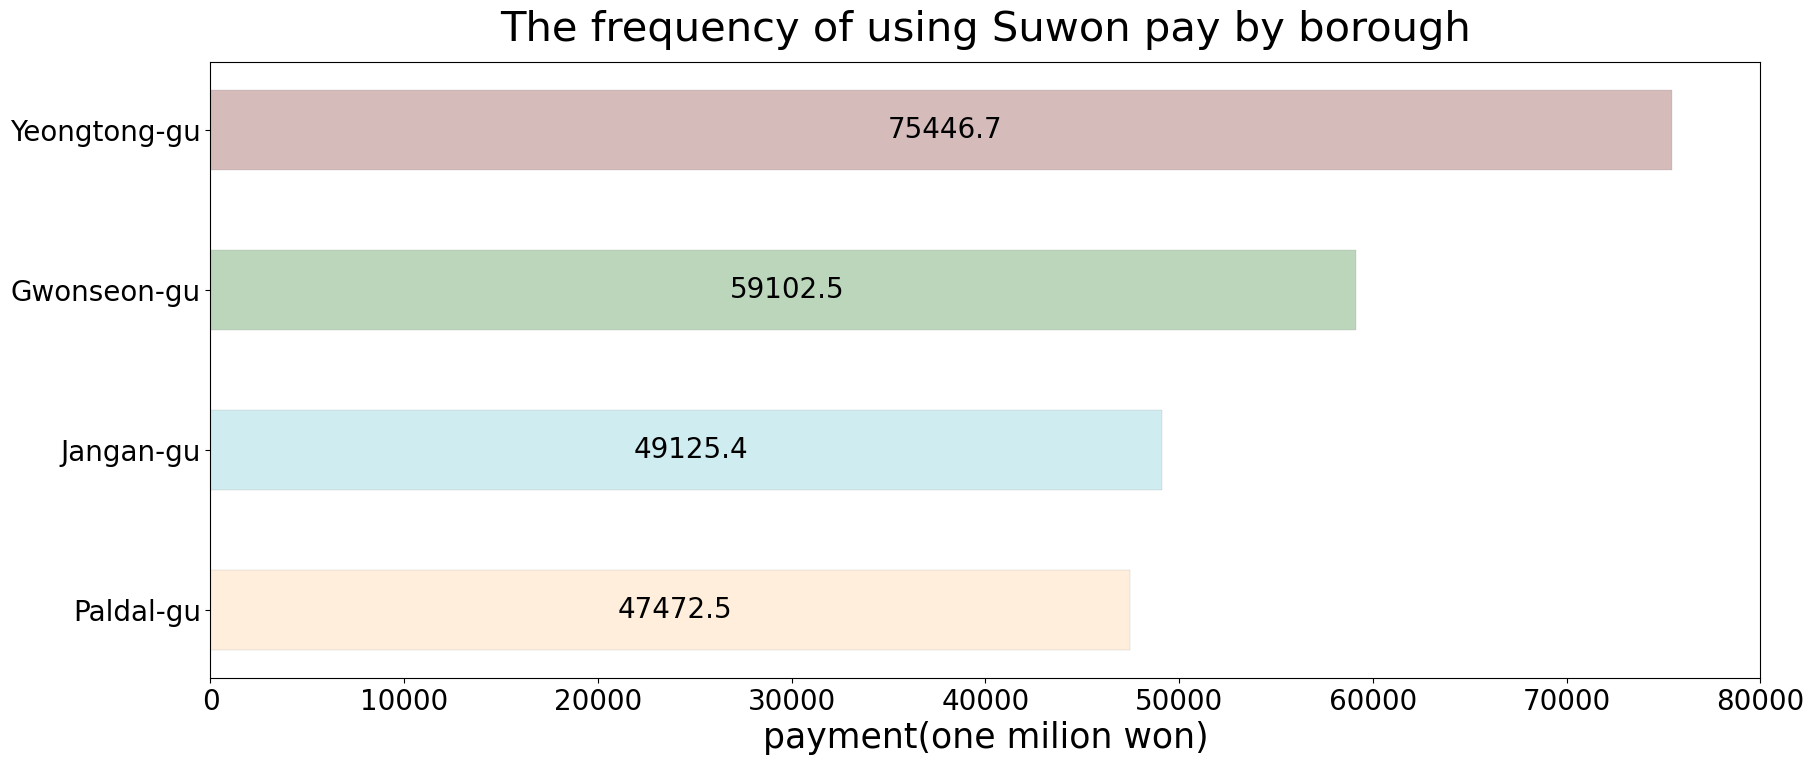

In [211]:
plt.figure(figsize = (20, 8))

x = df2_brgh_total['borough']
y = df2_brgh_total['payment_one_milion_won']

bars = plt.barh(x, y, color=['bisque', 'powderblue', 'darkseagreen', 'rosybrown'], alpha = 0.6, height=0.5,
        edgecolor = 'grey', linewidth=0.2) 
plt.bar_label(bars, size = 20, padding = 3,  label_type = 'center')

plt.xlabel('payment(one milion won)', fontsize = 25)
#plt.ylabel('borough', fontsize = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.title('The frequency of using Suwon pay by borough', fontsize = 30, pad = 15)
plt.xlim(0,80000)

plt.savefig('The frequency of using Suwon pay by borough.png', dpi=200, transparent=False)
plt.show()

### 2.4. The frequency of using Suwon-pay by ward ('dong' in Korean)

In [212]:
df2_ward = df2.iloc[:, [1,2,5,6]]
df2_ward

,borough,ward,payment_won,payment_one_milion_won
0,Gwonseon-gu,Gosaek-dong,106900,0
1,Gwonseon-gu,Gosaek-dong,29000,0
2,Gwonseon-gu,Gosaek-dong,5600,0
3,Gwonseon-gu,Gosaek-dong,13600,0
4,Gwonseon-gu,Gosaek-dong,2160910,2
...,...,...,...,...
128645,Paldal-gu,Hwaseo-dong,17900,0
128646,Paldal-gu,Hwaseo-dong,27690,0
128647,Paldal-gu,Hwaseo-dong,12000,0
128648,Paldal-gu,Hwaseo-dong,72900,0


In [213]:
# divide into 4 boroughs 
df2_ward_gwonseon = df2_ward[df2_ward.borough == 'Gwonseon-gu']
df2_ward_yeongtong = df2_ward[df2_ward.borough == 'Yeongtong-gu']
df2_ward_jangan = df2_ward[df2_ward.borough == 'Jangan-gu']
df2_ward_paldal = df2_ward[df2_ward.borough == 'Paldal-gu']

In [214]:
# Gwonseon-gu wards
df2_ward_gwonseon_total = df2_ward_gwonseon.groupby('ward').sum()

## Make a new column in million-won units
df2_ward_gwonseon_total['payment_one_milion_won'] = df2_ward_gwonseon_total['payment_won'] / 1000000

df2_ward_gwonseon_total = df2_ward_gwonseon_total.sort_values(by=['payment_won'], ascending=False)
df2_ward_gwonseon_total

,payment_won,payment_one_milion_won
ward,,
Gwonseon-dong,15284696237,"15,285"
Geumgok-dong,11559944550,"11,560"
Homaesil-dong,6765677573,"6,766"
Seryu-dong,5247274724,"5,247"
Gosaek-dong,4166650041,"4,167"
Tap-dong,3636985546,"3,637"
Guun-dong,3476111530,"3,476"
Gokbanjeon-dong,2848145504,"2,848"
Omokchen-dong,2139173453,"2,139"


In [215]:
# Yeongtong-gu wards
df2_ward_yeongtong_total = df2_ward_yeongtong.groupby('ward').sum()

## Make a new column in million-won units
df2_ward_yeongtong_total['payment_one_milion_won'] = df2_ward_yeongtong_total['payment_won'] / 1000000

df2_ward_yeongtong_total = df2_ward_yeongtong_total.sort_values(by=['payment_won'], ascending=False)
df2_ward_yeongtong_total

,payment_won,payment_one_milion_won
ward,,
Yeongtong-dong,24399979565,"24,400"
Maetan-dong,17439978053,"17,440"
Iui-dong,13512010760,"13,512"
Mangpo-dong,9317367319,"9,317"
Woncheon-dong,5664044949,"5,664"
Ha-dong,3271227057,"3,271"
Sin-dong,1843127608,"1,843"


In [216]:
# Jangan-gu wards
df2_ward_jangan_total = df2_ward_jangan.groupby('ward').sum()

## Make a new column in million-won units
df2_ward_jangan_total['payment_one_milion_won'] = df2_ward_jangan_total['payment_won'] / 1000000

df2_ward_jangan_total = df2_ward_jangan_total.sort_values(by=['payment_won'], ascending=False)
df2_ward_jangan_total

,payment_won,payment_one_milion_won
ward,,
Jeongja-dong,13937893470,"13,938"
Cheoncheon-dong,6925845929,"6,926"
Jowon-dong,6389253765,"6,389"
Yuljeon-dong,6364675993,"6,365"
Pajang-dong,4117862707,"4,118"
Songjuk-dong,3658298345,"3,658"
Yeonghwa-dong,3650116494,"3,650"
Yeonmu-dong,2246394231,"2,246"
Imok-dong,1557991106,"1,558"


In [217]:
# Paldal-gu wards
df2_ward_paldal_total = df2_ward_paldal.groupby('ward').sum()

## Make a new column in million-won units
df2_ward_paldal_total['payment_one_milion_won'] = df2_ward_paldal_total['payment_won'] / 1000000

df2_ward_paldal_total = df2_ward_paldal_total.sort_values(by=['payment_won'], ascending=False)
df2_ward_paldal_total

,payment_won,payment_one_milion_won
ward,,
Ingye-dong,14672099347,"14,672"
Hwaseo-dong,8315287661,"8,315"
Uman-dong,7033090783,"7,033"
Maesanro1ga,3202241778,"3,202"
Ji-dong,2712521123,"2,713"
Yeong-dong,1703860913,"1,704"
Paldallo3ga,1495640079,"1,496"
Gyo-dong,1475452781,"1,475"
Maesanro2ga,1449523288,"1,450"


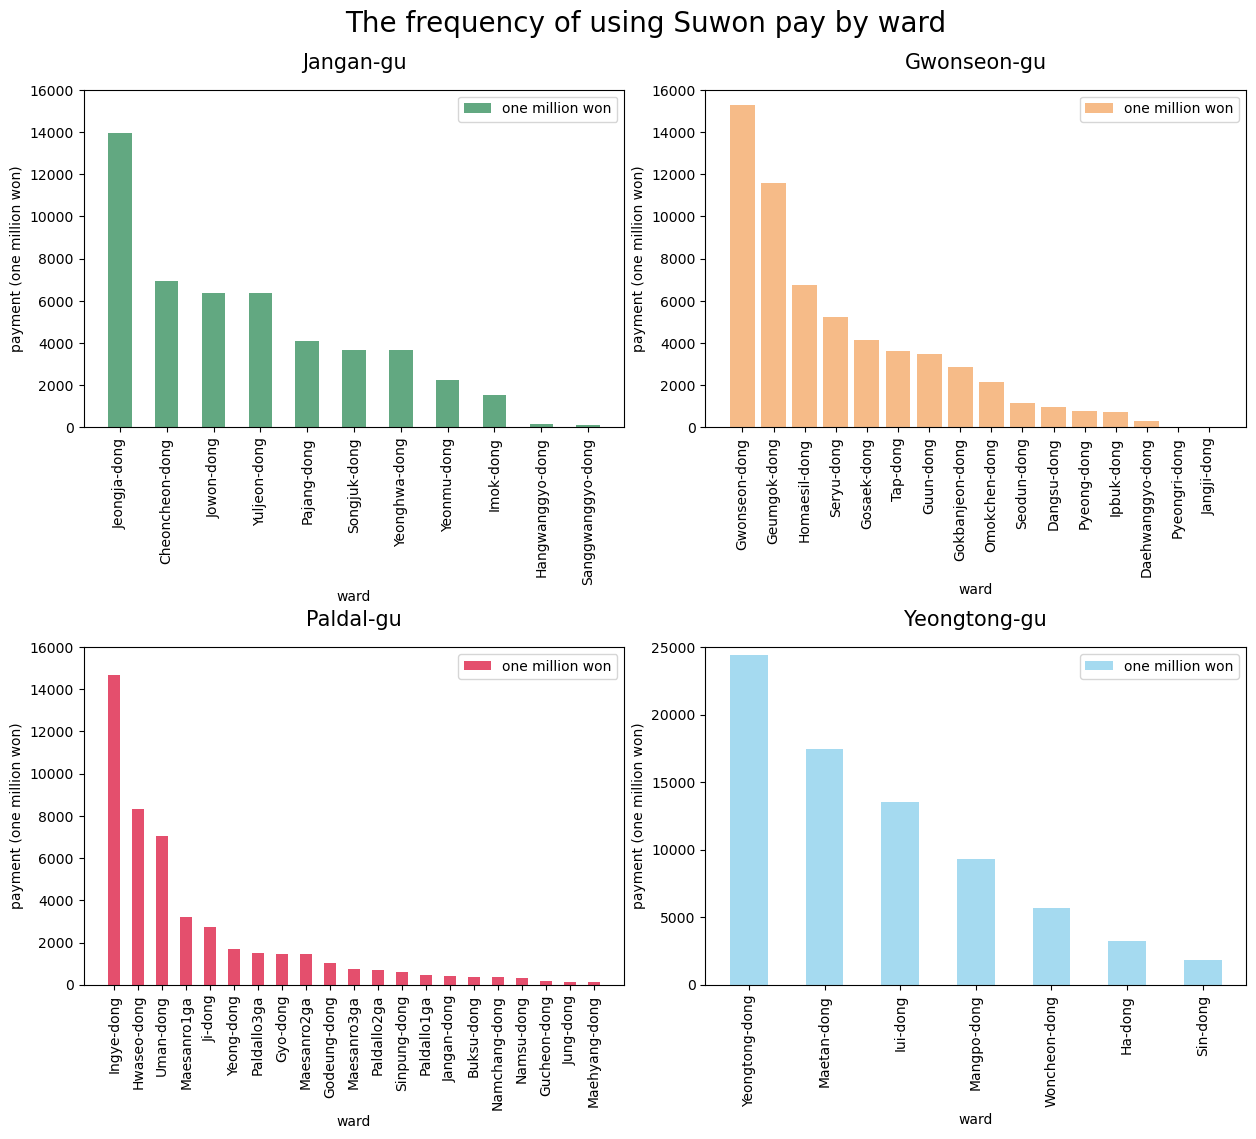

In [218]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 
fig.suptitle('The frequency of using Suwon pay by ward', fontsize = 20)
plt.subplots_adjust(left=0.125, bottom=0.005, right=0.9, top=0.9, wspace=0.15, hspace=0.65)

# Jangan-gu
axs[0, 0].bar(df2_ward_jangan_total.index, df2_ward_jangan_total['payment_one_milion_won'], 
              label = 'one million won', color = 'seagreen', width=0.5, alpha = 0.75) 
axs[0, 0].set_title('Jangan-gu', pad = 15, size=15) 
axs[0, 0].legend() 
axs[0, 0].set(xlabel='ward', ylabel='payment (one million won)') 
axs[0, 0].tick_params(axis='x', rotation = 90)
axs[0, 0].set_ylim(0,16000)

# Gwonseon-gu
axs[0, 1].bar(df2_ward_gwonseon_total.index, df2_ward_gwonseon_total['payment_one_milion_won'], 
              label = 'one million won', color = 'sandybrown', alpha = 0.75) 
axs[0, 1].set_title('Gwonseon-gu', pad = 15, size=15) 
axs[0, 1].legend() 
axs[0, 1].set(xlabel='ward', ylabel='payment (one million won)') 
axs[0, 1].tick_params(axis='x', rotation = 90)
axs[0, 1].set_ylim(0,16000)

# Paldal-gu
axs[1, 0].bar(df2_ward_paldal_total.index, df2_ward_paldal_total['payment_one_milion_won'], 
              label = 'one million won',color = 'crimson', width=0.5, alpha = 0.75) 
axs[1, 0].set_title('Paldal-gu', pad = 15, size=15) 
axs[1, 0].legend() 
axs[1, 0].set(xlabel='ward', ylabel='payment (one million won)') 
axs[1, 0].tick_params(axis='x', rotation = 90)
axs[1, 0].set_ylim(0,16000)

# Yeongtong-gu
axs[1, 1].bar(df2_ward_yeongtong_total.index, df2_ward_yeongtong_total['payment_one_milion_won'], 
              label = 'one million won',color = 'skyblue', width=0.5, alpha = 0.75) 
axs[1, 1].set_title('Yeongtong-gu', pad = 15, size=15) 
axs[1, 1].legend() 
axs[1, 1].set(xlabel='ward', ylabel='payment (one million won)') 
axs[1, 1].tick_params(axis='x', rotation = 90)
axs[1, 1].set_ylim(0, 25000)

plt.savefig('The frequency of using Suwon pay by ward.png', bbox_inches='tight', dpi=200, transparent=False)

## 3. The number of / the percentage of / the amount of payment of stores by industry (category)

### 3.1. The number and the percentage of stores by industry

In [219]:
# Remove etc column
idx2 = df2[df2['category']== '기타'].index
df2 = df2.drop(idx2)
df2

,year_month,borough,ward,age,category,payment_won,payment_one_milion_won
0,2020-11,Gwonseon-gu,Gosaek-dong,10s,Leisure_shop,106900,0
1,2020-11,Gwonseon-gu,Gosaek-dong,10s,Health_and_sanitation,29000,0
2,2020-11,Gwonseon-gu,Gosaek-dong,10s,Books_and_stationery,5600,0
3,2020-11,Gwonseon-gu,Gosaek-dong,10s,Pharmacy,13600,0
4,2020-11,Gwonseon-gu,Gosaek-dong,10s,Distribution_Industry_for_profit,2160910,2
...,...,...,...,...,...,...,...
128645,2019-04,Paldal-gu,Hwaseo-dong,over_60s,Pharmacy,17900,0
128646,2019-04,Paldal-gu,Hwaseo-dong,over_60s,Distribution_Industry_for_profit,27690,0
128647,2019-04,Paldal-gu,Hwaseo-dong,over_60s,Beverage_and_food,12000,0
128648,2019-04,Paldal-gu,Hwaseo-dong,over_60s,GP,72900,0


In [220]:
#The number of stores by industry(category) 
df2_store_type = df2.drop(['borough', 'ward', 'age', 'payment_won', 'payment_one_milion_won'], axis=1)
df2_store_type = df2_store_type.groupby(['category']).count() 
df2_store_type = df2_store_type.reset_index()
df2_store_type = df2_store_type.rename(columns={'year_month':'the_number_of_stores'}) 
df2_store_type

,category,the_number_of_stores
0,Accommodation_business,1277
1,Agiculture,642
2,Automobile_maintenance,3806
3,Beverage_and_food,9541
4,Books_and_stationery,4671
5,Buiding_materials,2326
6,Car_sales,161
7,Clothing,5075
8,Culture_and_hobby,5107
9,Distribution_Industry_for_profit,10356


In [221]:
#The percentage of stores by industry(category) 
df2_store_type['the_percentage_of_stores'] = round((df2_store_type['the_number_of_stores'] / df2_store_type['the_number_of_stores'].sum()*100), 2)
df2_store_type_sort = df2_store_type.sort_values('the_number_of_stores', ascending=False)
df2_store_type_sort

,category,the_number_of_stores,the_percentage_of_stores
29,Restaurants,11951,9
9,Distribution_Industry_for_profit,10356,8
3,Beverage_and_food,9541,8
15,Health_and_sanitation,7766,6
26,Pharmacy,7666,6
14,GP,7159,6
19,Leisure_shop,5911,5
22,Miscellaneous_goods,5300,4
8,Culture_and_hobby,5107,4
7,Clothing,5075,4


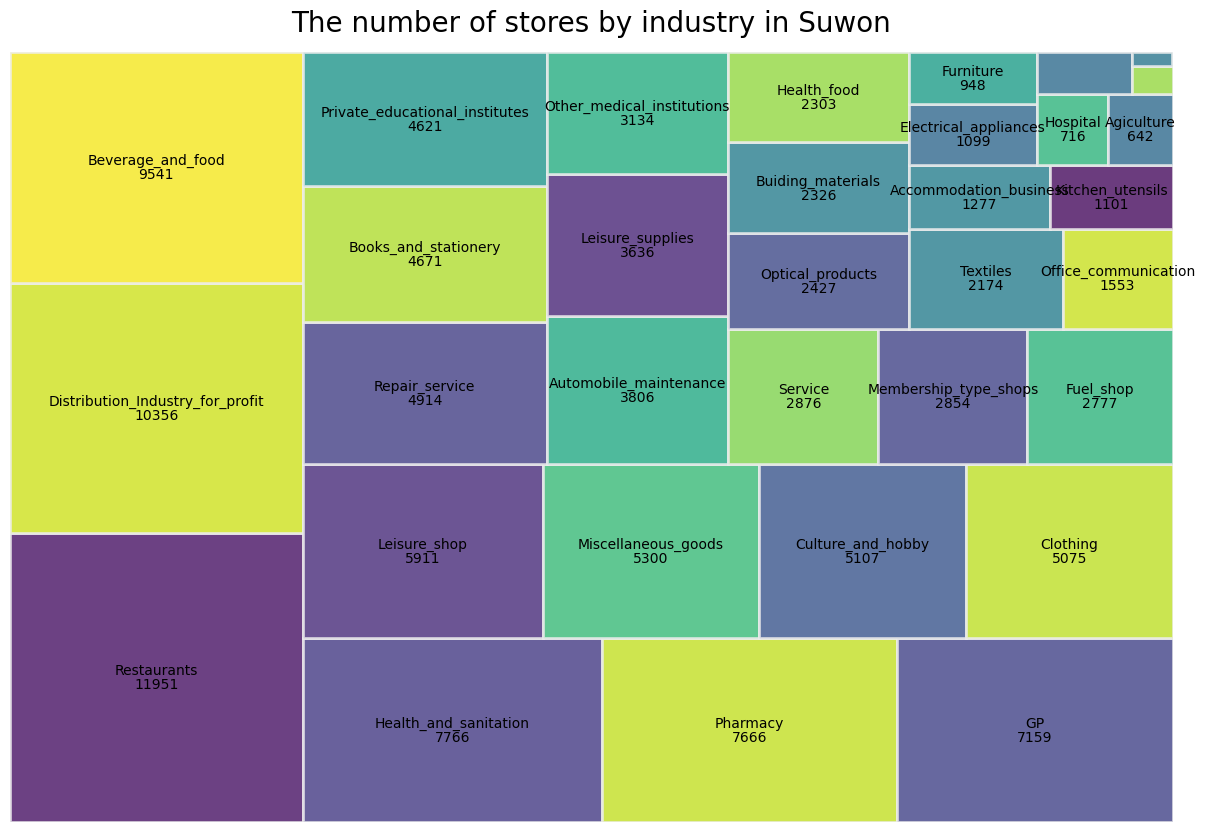

In [222]:
fig, axs = plt.subplots(1, figsize=(15, 10)) 

squarify.plot(sizes=df2_store_type_sort['the_number_of_stores'], 
              label = df2_store_type_sort['category'][:30],
              value = df2_store_type_sort['the_number_of_stores'][:30], 
              alpha=0.8, bar_kwargs=dict(linewidth=2, edgecolor="#eee"))

plt.title("The number of stores by industry in Suwon", fontsize = 20, pad = 15)
plt.axis('off')

plt.savefig('The number of stores by industry in Suwon.png', dpi=200, transparent=False)
plt.show()

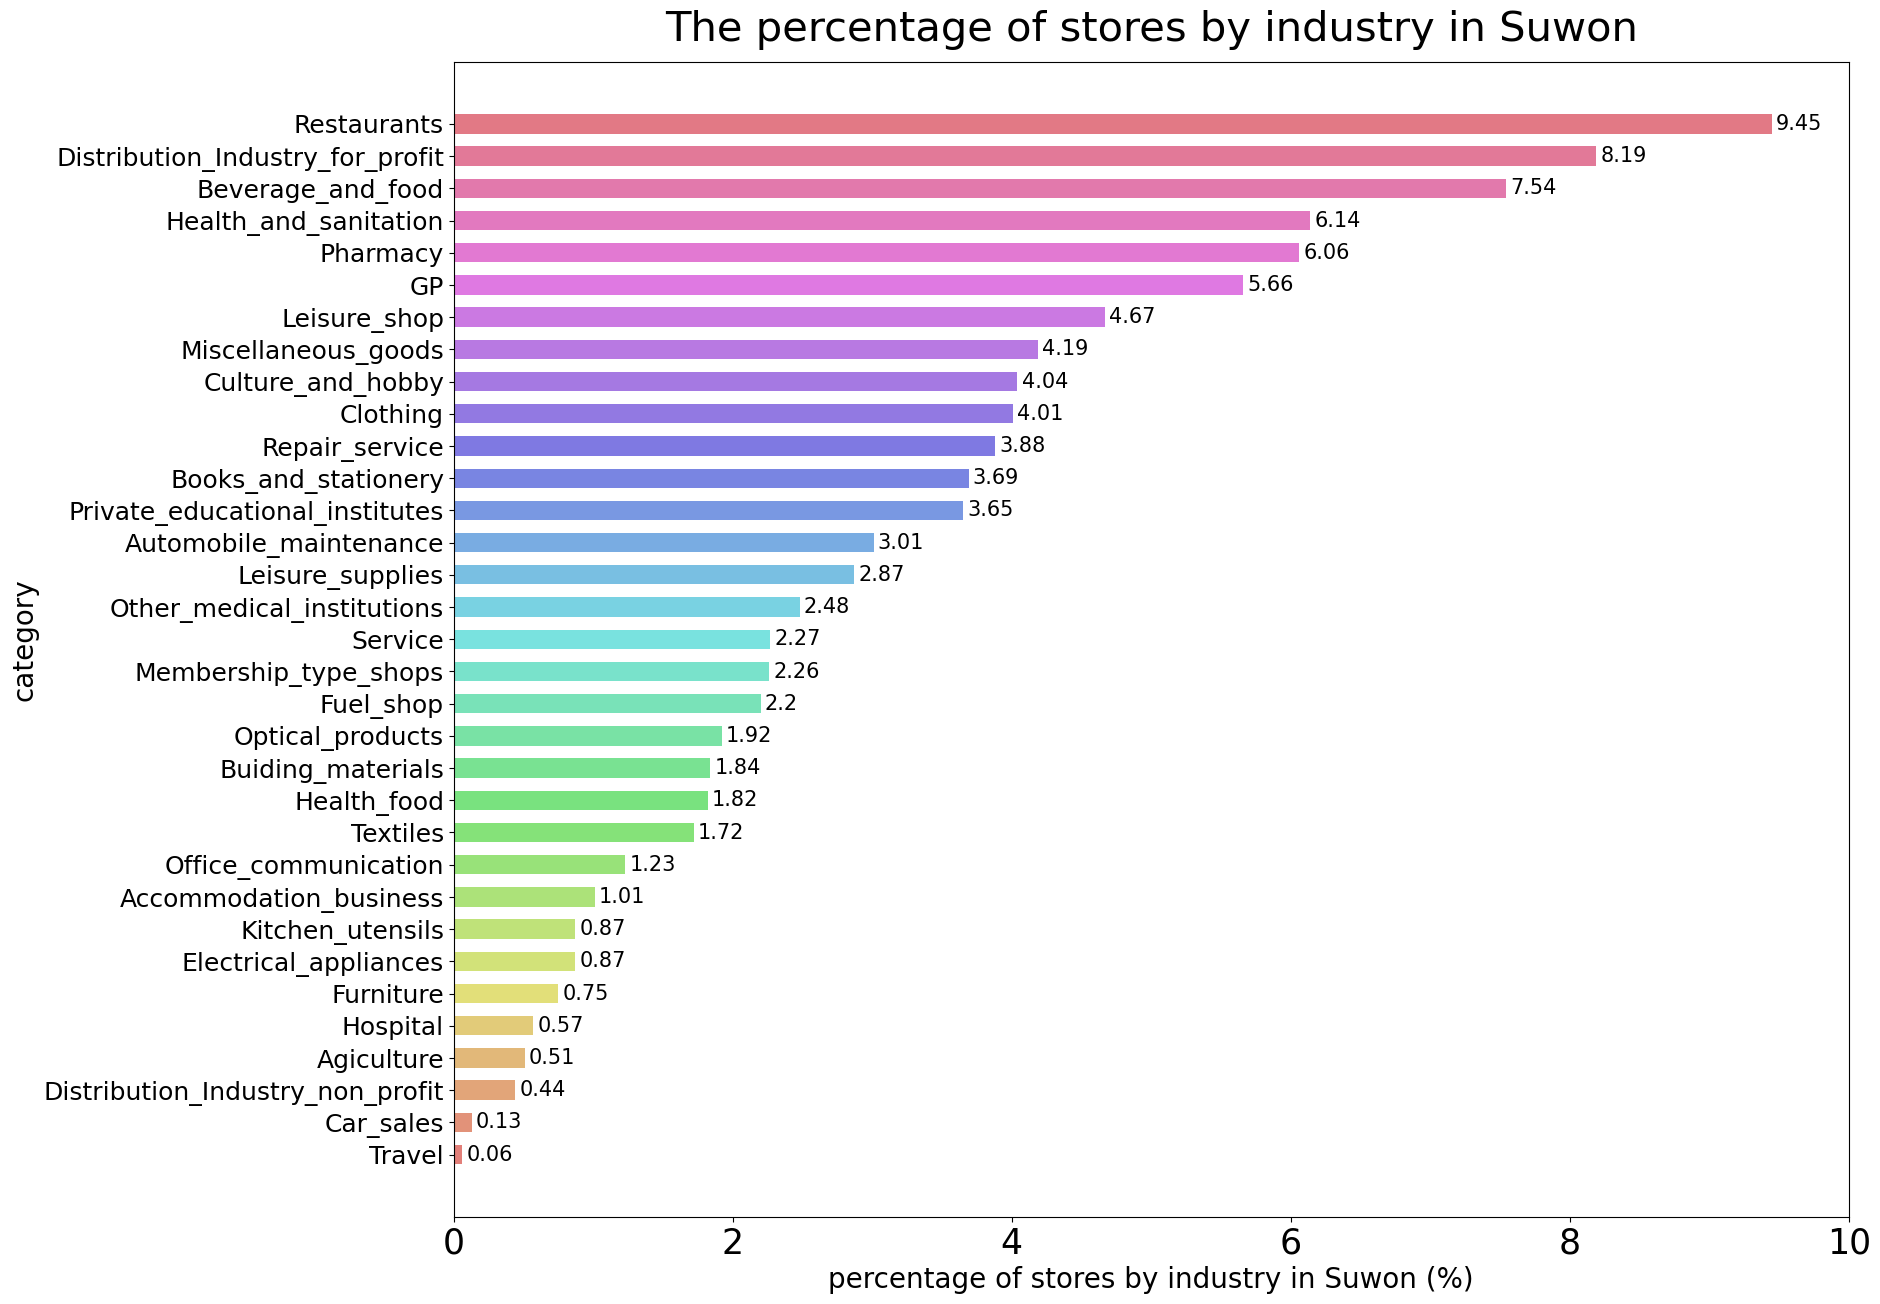

In [224]:
df2_store_type_sort.sort_values('the_percentage_of_stores', ascending=True, inplace=True)

plt.figure(figsize = (18, 15))

x = df2_store_type_sort['category']
y = df2_store_type_sort['the_percentage_of_stores']
colors = sns.color_palette('hls',len(x))

bars = plt.barh(x, y, color=colors, alpha = 0.8, height=0.6) 
plt.bar_label(bars, size = 15, padding = 3,  label_type = 'edge')

plt.xlabel('percentage of stores by industry in Suwon (%)', fontsize = 20)
plt.ylabel('category', fontsize = 20)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 18)
plt.title('The percentage of stores by industry in Suwon', fontsize = 30, pad = 15)
plt.xlim(0,10)

plt.savefig('The percentage of stores by industry in Suwon.png', bbox_inches='tight', dpi=200, transparent=False)
plt.show()

### 3.2. The amount of  payment of stores by industry

In [225]:
df2_store_payment = df2.iloc[:, [4,5,6]]
df2_store_payment

,category,payment_won,payment_one_milion_won
0,Leisure_shop,106900,0
1,Health_and_sanitation,29000,0
2,Books_and_stationery,5600,0
3,Pharmacy,13600,0
4,Distribution_Industry_for_profit,2160910,2
...,...,...,...
128645,Pharmacy,17900,0
128646,Distribution_Industry_for_profit,27690,0
128647,Beverage_and_food,12000,0
128648,GP,72900,0


In [226]:
df2_store_payment_total = df2_store_payment.groupby('category').sum().reset_index()
df2_store_payment_total.head()

,category,payment_won,payment_one_milion_won
0,Accommodation_business,297768035,298
1,Agiculture,58301163,58
2,Automobile_maintenance,1920193618,"1,920"
3,Beverage_and_food,26389520140,"26,389"
4,Books_and_stationery,1912183827,"1,911"


In [227]:
df2_store_payment_total_sort = df2_store_payment_total.sort_values('payment_one_milion_won', ascending=False)
df2_store_payment_total_sort

,category,payment_won,payment_one_milion_won
29,Restaurants,76861151454,"76,861"
9,Distribution_Industry_for_profit,32985205181,"32,985"
3,Beverage_and_food,26389520140,"26,389"
27,Private_educational_institutes,25090769513,"25,091"
15,Health_and_sanitation,14268289406,"14,268"
14,GP,10668385193,"10,668"
19,Leisure_shop,5804450628,"5,804"
26,Pharmacy,4908279905,"4,908"
12,Fuel_shop,4714846078,"4,715"
21,Membership_type_shops,4206147406,"4,206"


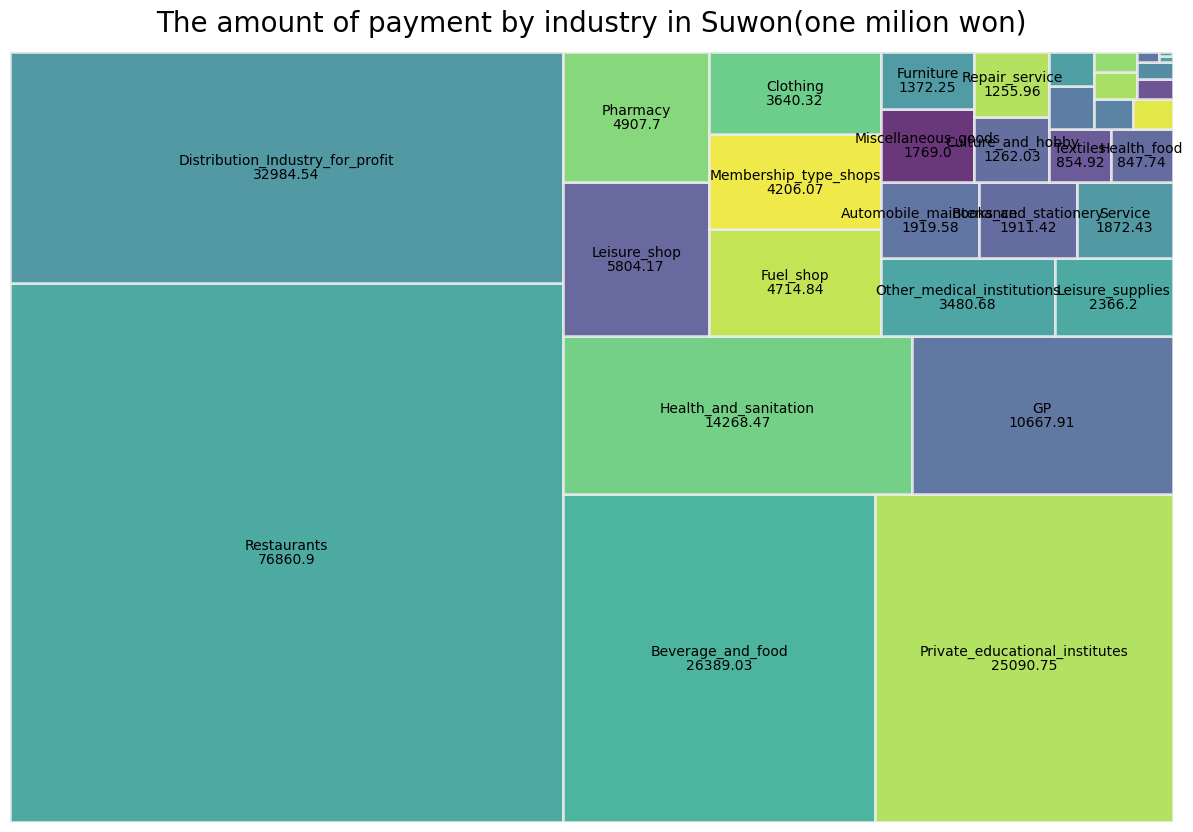

In [228]:
fig, axs = plt.subplots(1, figsize=(15, 10)) 

squarify.plot(sizes=df2_store_payment_total_sort['payment_one_milion_won'], 
              label = df2_store_payment_total_sort['category'][:22],
              value = df2_store_payment_total_sort['payment_one_milion_won'][:22], 
              alpha=0.8, bar_kwargs=dict(linewidth=2, edgecolor="#eee"))

plt.title("The amount of payment by industry in Suwon(one milion won)", fontsize = 20, pad = 15)
plt.axis('off')

plt.savefig('The amount of payment by industry in Suwon.png', dpi=200, transparent=False)
plt.show()

### 3.3. (Hypothesis) The higher the number of stores, the higher the payment amount will be.

In [234]:
df2_store_merge = pd.merge(df2_store_type, df2_store_payment_total, left_on='category', right_on='category', how='outer')
df2_store_merge.head()

,category,the_number_of_stores,the_percentage_of_stores,payment_won,payment_one_milion_won
0,Accommodation_business,1277,1,297768035,298
1,Agiculture,642,1,58301163,58
2,Automobile_maintenance,3806,3,1920193618,"1,920"
3,Beverage_and_food,9541,8,26389520140,"26,389"
4,Books_and_stationery,4671,4,1912183827,"1,911"


In [230]:
#Pearson correlation coefficient
rho, p_val = stats.pearsonr(df2_store_merge['the_number_of_stores'], df2_store_merge['payment_won'])
print("correlation coefficient : {}, p-value : {}".format(rho, p_val))

correlation coefficient : 0.7609862027043832, p-value : 2.735506356429199e-07


In [231]:
#Spearman correlation coefficient
rho, p_val = stats.spearmanr(df2_store_merge['the_number_of_stores'], df2_store_merge['payment_won'])
print("correlation coefficient : {}, p-value : {}".format(rho, p_val))

correlation coefficient : 0.8669786096256685, p-value : 6.822457120657968e-11


In [235]:
df2_store_merge_filter = df2_store_merge.iloc[:,[0,1,3]]
df2_store_merge_filter

,category,the_number_of_stores,payment_won
0,Accommodation_business,1277,297768035
1,Agiculture,642,58301163
2,Automobile_maintenance,3806,1920193618
3,Beverage_and_food,9541,26389520140
4,Books_and_stationery,4671,1912183827
5,Buiding_materials,2326,305251690
6,Car_sales,161,19353770
7,Clothing,5075,3640658452
8,Culture_and_hobby,5107,1262152146
9,Distribution_Industry_for_profit,10356,32985205181


In [236]:
corr = df2_store_merge_filter.corr()
corr

,the_number_of_stores,payment_won
the_number_of_stores,1,1
payment_won,1,1


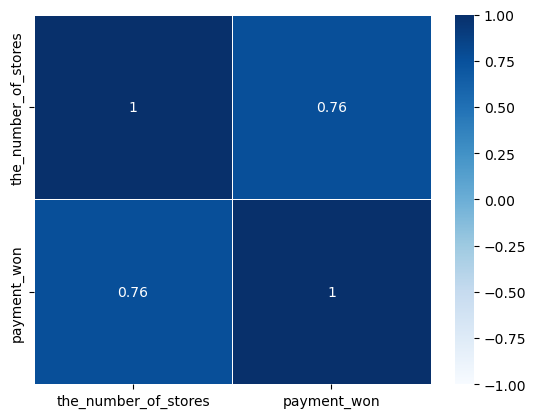

In [266]:
sns.heatmap(corr, cmap='Blues', annot = True, linewidths=.5,
           vmin = -1, vmax = 1)
plt.savefig('corr.png', bbox_inches='tight', dpi=200, transparent=False)

In [243]:
# create a fitted model in one line
lm = smf.ols(formula='the_number_of_stores ~ payment_won', data=df2_store_merge).fit()

# print the coefficients
lm.params

Intercept     2,743
payment_won       0
dtype: float64

In [244]:
df2_store_merge['payment_won'].describe()

count               33
mean     6,996,543,692
std     14,972,409,713
min         15,012,100
25%        305,251,690
50%      1,769,438,702
75%      4,714,846,078
max     76,861,151,454
Name: payment_won, dtype: float64

In [245]:
# summary 
print(lm.summary())

                             OLS Regression Results                             
Dep. Variable:     the_number_of_stores   R-squared:                       0.579
Model:                              OLS   Adj. R-squared:                  0.566
Method:                   Least Squares   F-statistic:                     42.65
Date:                  Sun, 08 Jan 2023   Prob (F-statistic):           2.74e-07
Time:                          18:56:39   Log-Likelihood:                -296.95
No. Observations:                    33   AIC:                             597.9
Df Residuals:                        31   BIC:                             600.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2743.4011    389.

In [246]:
X_new = pd.DataFrame({'payment_won': [1769438702.00]}) 
X_new

,payment_won
0,"1,769,438,702"


In [247]:
preds = lm.predict(X_new)
preds

0   3,019
dtype: float64

In [248]:
lm.fittedvalues.head()

0   2,790
1   2,752
2   3,042
3   6,853
4   3,041
dtype: float64

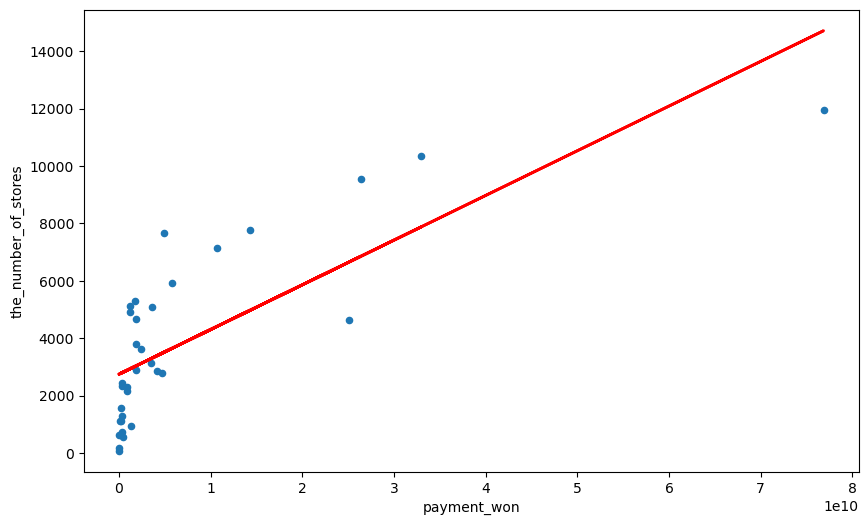

In [249]:
#scatter plot
fig, axs = plt.subplots(figsize = (10, 6))
df2_store_merge.plot(kind='scatter', x='payment_won', y='the_number_of_stores', ax=axs, figsize=(10, 6))
plt.plot(df2_store_merge['payment_won'],lm.fittedvalues,color='red', linewidth = 2)
#plt.savefig('scatterplot_lr.png', dpi=300, transparent=True)

## 4. The frequency of store usage by age

In [250]:
# Filter data by age_10s
idx_10s = df2[df2['age']!='10s'].index
df2_10s = df2.drop(idx_10s)

df2_10s = df2_10s.iloc[:, [4,5]]
df2_10s = df2_10s.groupby('category').sum(['payment_won']).reset_index()
df2_10s = df2_10s.rename(columns={'payment_won':'payment_10s'}) 
df2_10s.head(3)

,category,payment_10s
0,Accommodation_business,1123000
1,Agiculture,99000
2,Automobile_maintenance,12236041


In [252]:
# Filter data by age_20s
idx_20s = df2[df2['age']!='20s'].index
df2_20s = df2.drop(idx_20s)

df2_20s = df2_20s.iloc[:, [4,5]]
df2_20s = df2_20s.groupby('category').sum(['payment_won']).reset_index()
df2_20s = df2_20s.rename(columns={'payment_won':'payment_20s'}) 
df2_20s.head(3)

,category,payment_20s
0,Accommodation_business,194911516
1,Agiculture,4184940
2,Automobile_maintenance,269179486


In [253]:
# Filter data by age_30s
idx_30s = df2[df2['age']!='30s'].index
df2_30s = df2.drop(idx_30s)

df2_30s = df2_30s.iloc[:, [4,5]]
df2_30s = df2_30s.groupby('category').sum(['payment_won']).reset_index()
df2_30s = df2_30s.rename(columns={'payment_won':'payment_30s'}) 
df2_30s.head(3)

,category,payment_30s
0,Accommodation_business,49957187
1,Agiculture,5000690
2,Automobile_maintenance,591959890


In [254]:
# Filter data by age_40s
idx_40s = df2[df2['age']!='40s'].index
df2_40s = df2.drop(idx_40s)

df2_40s = df2_40s.iloc[:, [4,5]]
df2_40s = df2_40s.groupby('category').sum(['payment_won']).reset_index()
df2_40s = df2_40s.rename(columns={'payment_won':'payment_40s'}) 
df2_40s.head(3)

,category,payment_40s
0,Accommodation_business,27173783
1,Agiculture,10127450
2,Automobile_maintenance,572804757


In [255]:
# Filter data by age_50s
idx_50s = df2[df2['age']!='50s'].index
df2_50s = df2.drop(idx_50s)

df2_50s = df2_50s.iloc[:, [4,5]]
df2_50s = df2_50s.groupby('category').sum(['payment_won']).reset_index()
df2_50s = df2_50s.rename(columns={'payment_won':'payment_50s'}) 
df2_50s.head(3)

,category,payment_50s
0,Accommodation_business,19621249
1,Agiculture,20337203
2,Automobile_maintenance,339939129


In [256]:
# Filter data by age_over 60s
idx_over_60s = df2[df2['age']!='over_60s'].index
df2_over_60s = df2.drop(idx_over_60s)

df2_over_60s = df2_over_60s.iloc[:, [4,5]]
df2_over_60s = df2_over_60s.groupby('category').sum(['payment_won']).reset_index()
df2_over_60s = df2_over_60s.rename(columns={'payment_won':'payment_over_60s'}) 
df2_over_60s.head(3)

,category,payment_over_60s
0,Accommodation_business,4981300
1,Agiculture,18551880
2,Automobile_maintenance,134074315


In [257]:
#df2_x_join_1 = pd.merge(df2_0_9, df2_10s, left_on='category', right_on='category', how='outer')
df2_x_join_2 = pd.merge(df2_10s, df2_20s, left_on='category', right_on='category', how='outer')
df2_x_join_3 = pd.merge(df2_x_join_2, df2_30s, left_on='category', right_on='category', how='outer')
df2_x_join_4 = pd.merge(df2_x_join_3, df2_40s, left_on='category', right_on='category', how='outer')
df2_x_join_5 = pd.merge(df2_x_join_4, df2_50s, left_on='category', right_on='category', how='outer')
df2_x_join_6 = pd.merge(df2_x_join_5, df2_over_60s, left_on='category', right_on='category', how='outer')
df2_x_join_6

,category,payment_10s,payment_20s,payment_30s,payment_40s,payment_50s,payment_over_60s
0,Accommodation_business,"1,123,000",194911516,49957187,27173783,19621249,4981300
1,Agiculture,"99,000",4184940,5000690,10127450,20337203,18551880
2,Automobile_maintenance,"12,236,041",269179486,591959890,572804757,339939129,134074315
3,Beverage_and_food,"189,812,062",4087480993,5563042341,8256580612,5567853496,2723072276
4,Books_and_stationery,"37,541,113",343299116,596803419,763807397,143809883,26884999
5,Buiding_materials,"910,314",36763832,75442997,71579094,69539733,51015720
6,Car_sales,"55,000",7836150,3884800,5877420,1369000,331400
7,Clothing,"21,986,850",1125939233,714032623,706122429,704689930,367207587
8,Culture_and_hobby,"8,131,380",394167079,312537351,296929490,194675830,55668016
9,Distribution_Industry_for_profit,"291,417,989",7569107975,6842280451,9203296377,6383085367,2692839132


In [258]:
# Remove NaN
df2_x_join_6 = df2_x_join_6.fillna(0)
df2_x_join_6.tail(3)

,category,payment_10s,payment_20s,payment_30s,payment_40s,payment_50s,payment_over_60s
30,Service,"61,406,470",578674451,482108208,465029449,222549195,62905100
31,Textiles,"6,101,130",153425069,183892673,185207334,206553308,119606268
32,Travel,0,3285200,2032000,5837000,3604500,253400


In [259]:
df2_x_join_6['payment_total'] = df2_x_join_6['payment_10s'] + df2_x_join_6['payment_20s'] + df2_x_join_6['payment_30s'] + df2_x_join_6['payment_40s'] + df2_x_join_6['payment_50s'] + df2_x_join_6['payment_over_60s']

#percentage
df2_x_join_6['payment_10s_%'] = df2_x_join_6['payment_10s'] / df2_x_join_6['payment_total'] * 100
df2_x_join_6['payment_20s_%'] = df2_x_join_6['payment_20s'] / df2_x_join_6['payment_total'] * 100
df2_x_join_6['payment_30s_%'] = df2_x_join_6['payment_30s'] / df2_x_join_6['payment_total'] * 100
df2_x_join_6['payment_40s_%'] = df2_x_join_6['payment_40s'] / df2_x_join_6['payment_total'] * 100
df2_x_join_6['payment_50s_%'] = df2_x_join_6['payment_50s'] / df2_x_join_6['payment_total'] * 100
df2_x_join_6['payment_60s_%'] = df2_x_join_6['payment_over_60s'] / df2_x_join_6['payment_total'] * 100
df2_x_join_6.head()

,category,payment_10s,payment_20s,payment_30s,payment_40s,payment_50s,payment_over_60s,payment_total,payment_10s_%,payment_20s_%,payment_30s_%,payment_40s_%,payment_50s_%,payment_60s_%
0,Accommodation_business,"1,123,000",194911516,49957187,27173783,19621249,4981300,"297,768,035",0,65,17,9,7,2
1,Agiculture,"99,000",4184940,5000690,10127450,20337203,18551880,"58,301,163",0,7,9,17,35,32
2,Automobile_maintenance,"12,236,041",269179486,591959890,572804757,339939129,134074315,"1,920,193,618",1,14,31,30,18,7
3,Beverage_and_food,"189,812,062",4087480993,5563042341,8256580612,5567853496,2723072276,"26,387,841,780",1,15,21,31,21,10
4,Books_and_stationery,"37,541,113",343299116,596803419,763807397,143809883,26884999,"1,912,145,927",2,18,31,40,8,1


In [260]:
df2_x_join_total = df2_x_join_6.iloc[:, [0,8,9,10,11,12,13]]
df2_x_join_total

,category,payment_10s_%,payment_20s_%,payment_30s_%,payment_40s_%,payment_50s_%,payment_60s_%
0,Accommodation_business,0,65,17,9,7,2
1,Agiculture,0,7,9,17,35,32
2,Automobile_maintenance,1,14,31,30,18,7
3,Beverage_and_food,1,15,21,31,21,10
4,Books_and_stationery,2,18,31,40,8,1
5,Buiding_materials,0,12,25,23,23,17
6,Car_sales,0,40,20,30,7,2
7,Clothing,1,31,20,19,19,10
8,Culture_and_hobby,1,31,25,24,15,4
9,Distribution_Industry_for_profit,1,23,21,28,19,8


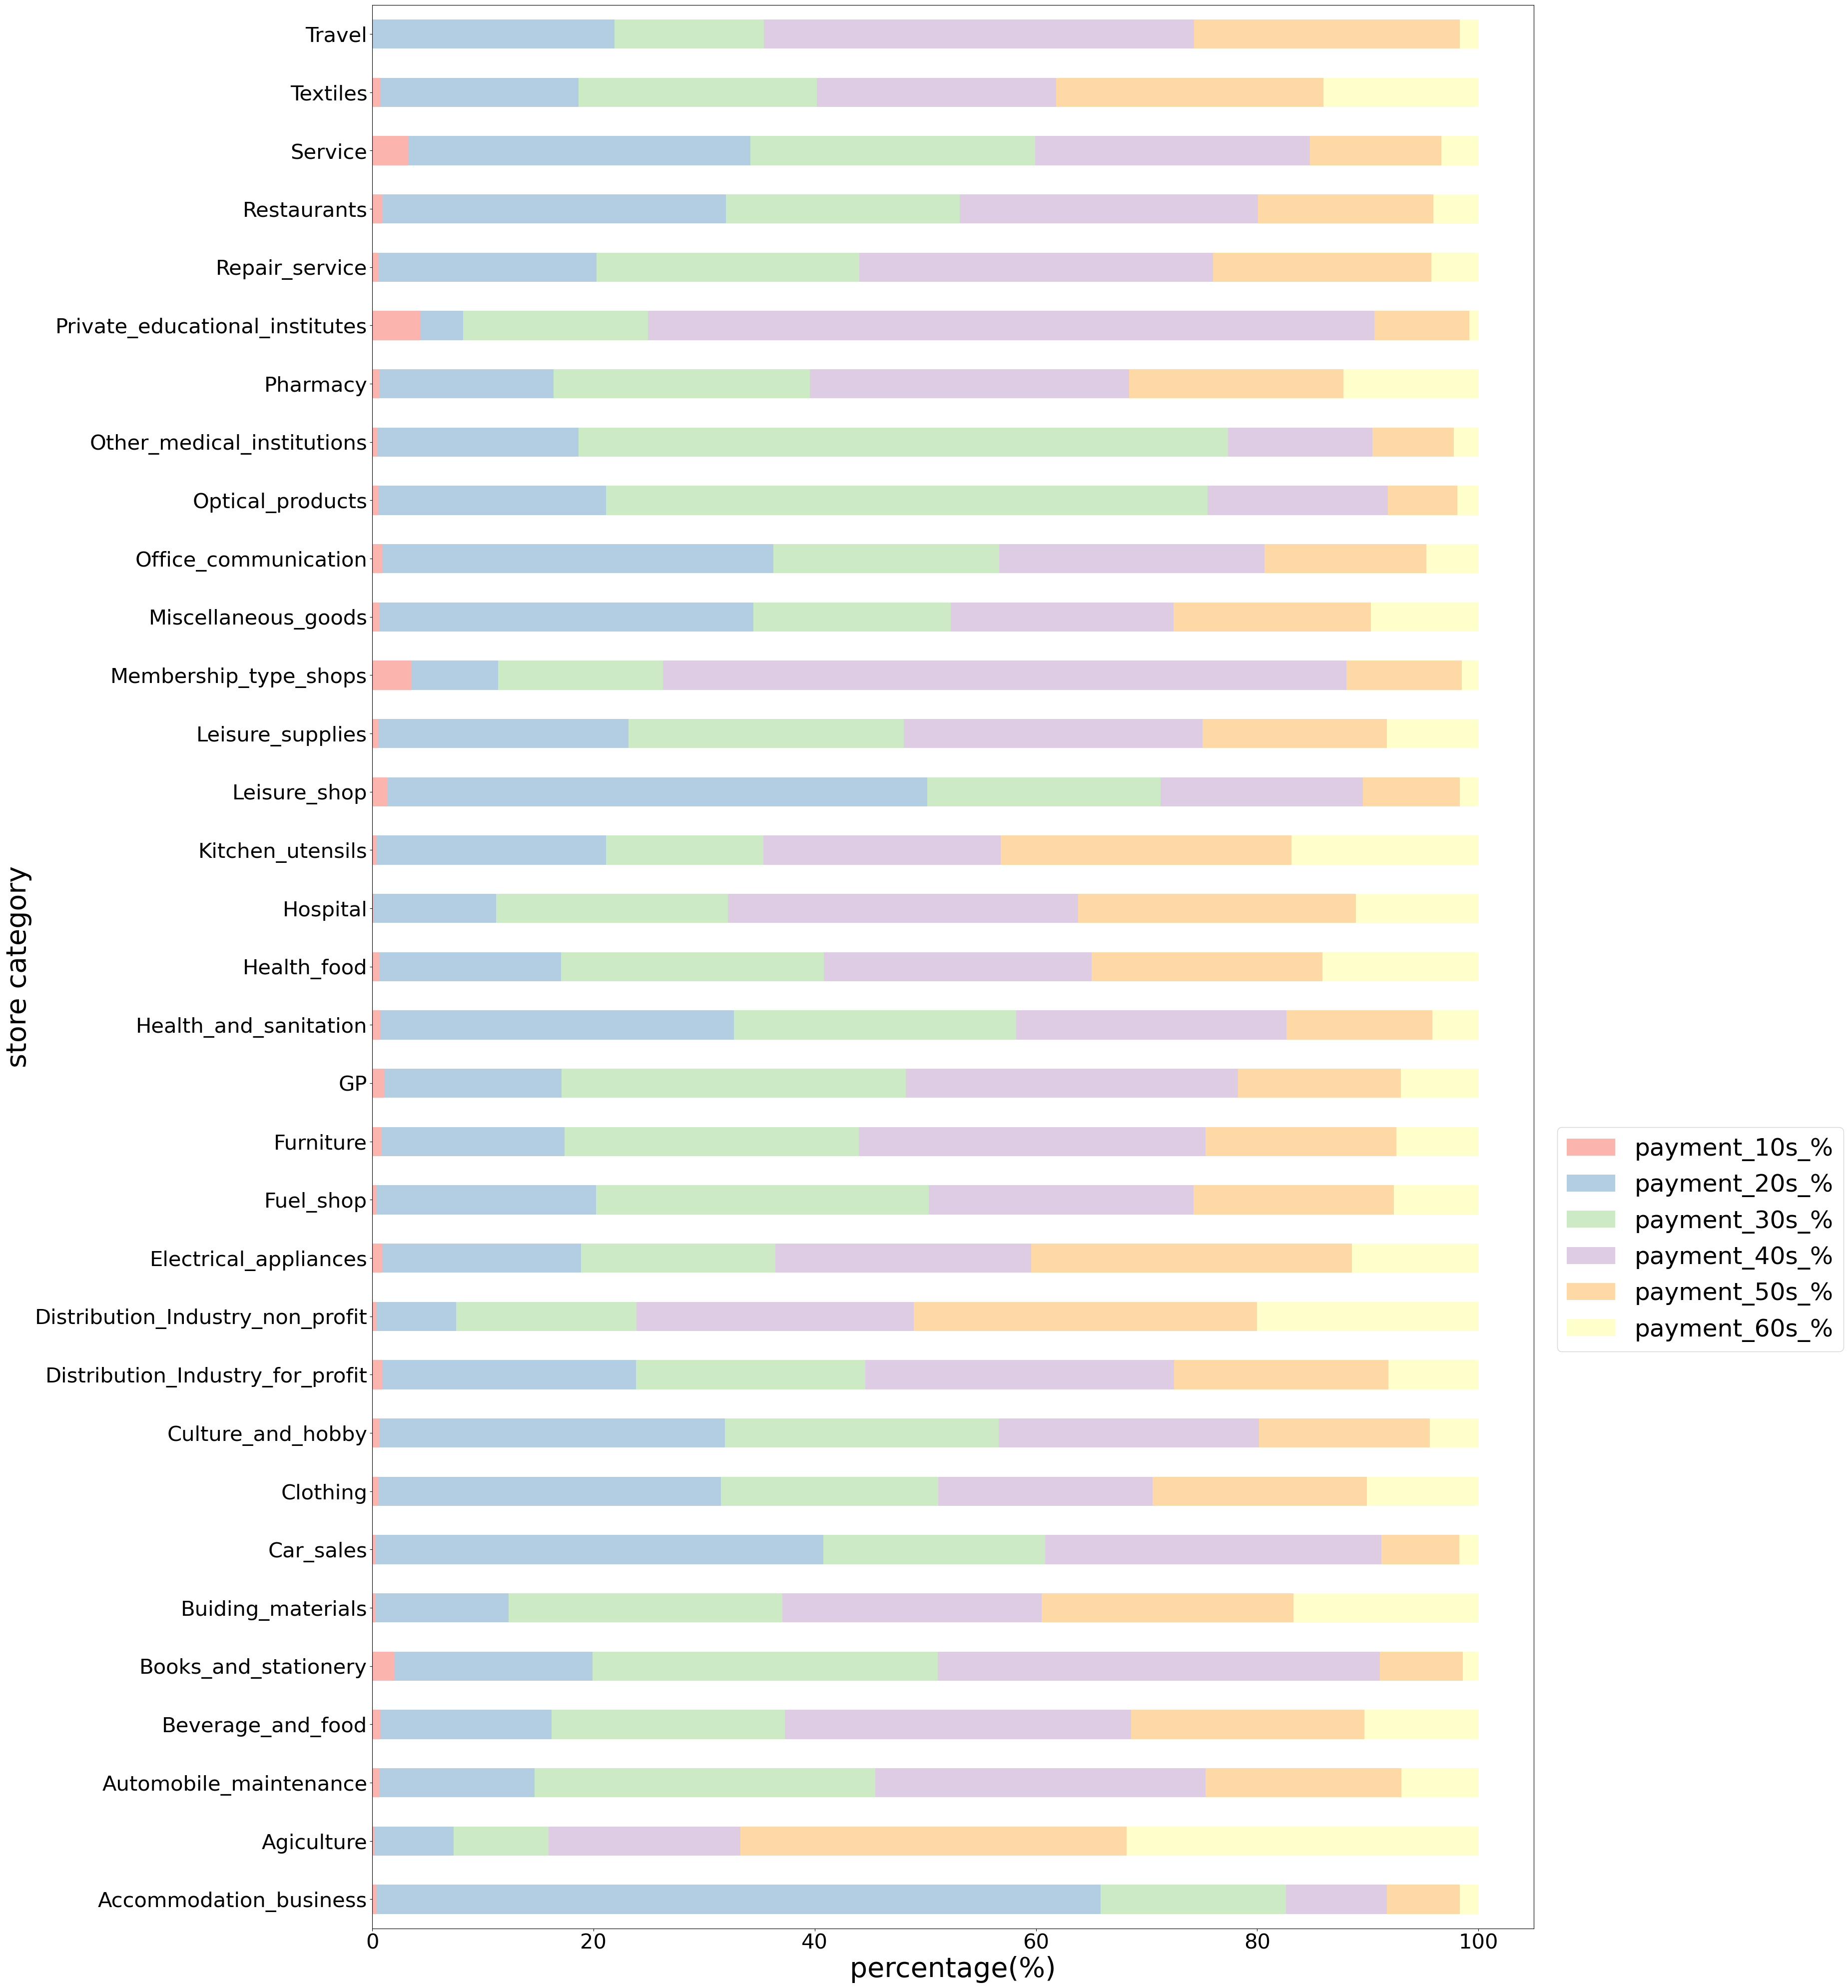

In [265]:
fig, ax = plt.subplots(figsize = (30, 50))
colors = sns.color_palette('Pastel1',len(x))

df2_x_join_total.plot(kind='barh', ax=ax, stacked=True, color=colors)

#fig.subtitle('The frequency of store usage by age') #, fontsize = 20)

plt.xlabel("percentage(%)", size = 40)
plt.ylabel("store category", size = 40)
#ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_yticklabels(df2_x_join_total['category'], fontsize= 30)
plt.legend(loc=(1.02, 0.3), fontsize=35)

plt.savefig('The frequency of store usage by age.png', bbox_inches='tight', dpi=200, transparent=False)